## Illustration of various ways of solving the normal equations for ordinary least squares

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---


In this notebook, we'll look at several ways to solve the normal equations for ordinary least squares (linear regression)

The normal equations for ordinary least squares can be written in matrix form as:
$$
X^T X \mathbf{w} = X^T \mathbf{y}
$$
or equivelently:
$$
\mathbf{w} = (X^TX)^{-1}X^T \mathbf{y}
$$
when $X^TX$ is invertible.

Here we explore four possible ways to solve:

- Using `linalg.lstsq`
- Solving the linear system directly with `linalg.solve`
- Computing the pseudoinverse using $(X^TX)^{-1}X^T$
- Computing the pseudoinverse with `linalg.pinv`


## Setup

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import seaborn as sns

sns.set_style('white')

## Data generation

Here we use scikit-learn's [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a random regression problem.

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(
    n_features=1, 
    n_informative=1, 
    noise=10.0, 
    bias=50, 
    random_state=42)

print(X.shape, y.shape)

(100, 1) (100,)


Define a helper functin for plotting the data and (optionally) regression line.

In [ ]:
def plot_it(X, y, w=None, b=None):
    figure(figsize=(6,6))
    
    # plot axes
    axhline(0, lw=0.5, color='gray')
    axvline(0, lw=0.5, color='gray')
    
    # plot data
    scatter(X, y, c='orange', s=40, alpha=0.75)
    
    # plot regression
    if w is not None:
        xs = np.linspace(X.min(), X.max(), 100)
        plot(xs, np.dot(xs[:, np.newaxis], w) + b, label="$\hat{y} = f(x)$")
    
    xlabel('x')
    ylabel('y')
    
    if w is not None:
        legend(loc='lower right', fontsize=16)

Plot the generated dataset.

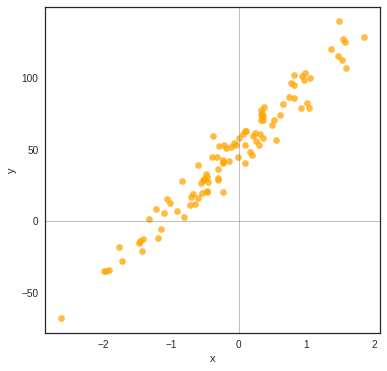

In [ ]:
plot_it(X, y)

## Construct the design matrix

We prepend a vector of ones to the features to construct a design matrix that will also account for the bias term:
$$
X_D = \begin{bmatrix} \mathbf{1} & \mathbf{x} \end{bmatrix},
$$
where $\mathbf{1}$ is a vector of ones of the appropriate dimension.

See the [slides on linear models](https://loop.dcu.ie/mod/resource/view.php?id=656498) (slide 16) for details.

In [ ]:
XD = np.c_[np.ones(X.shape[0]), X]

## Solve with numpy's lstsq

In [ ]:
w = np.linalg.lstsq(XD, y, rcond=None)[0]
b = w[0]
w = w[1:]
print('w =', round(w[0], 3), 'b =', round(b, 3))

w = 44.437 b = 51.165


Plot the regression line

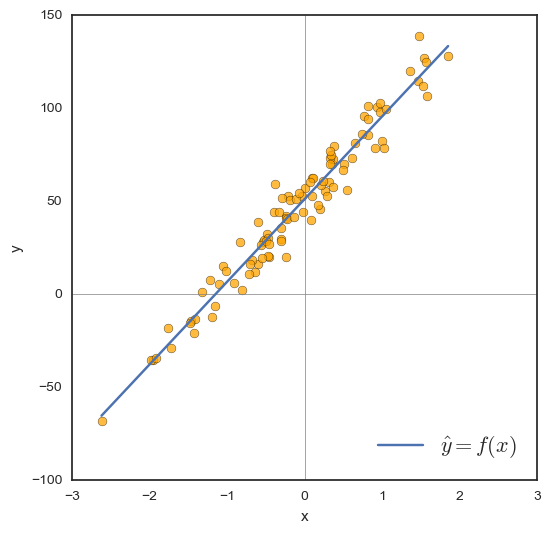

In [ ]:
plot_it(X, y, w, b)

## Solve using the normal equations directly

I.e. solve the linear system:

$$
X^T X \mathbf{w} = X^T \mathbf{y}
$$
using `linalg.solve`

In [ ]:
# solve normal equations directly
w = np.linalg.solve(XD.T @ XD, XD.T @ y)
b = w[0]
w = w[1:]
print('w =', round(w[0], 3), 'b =', round(b, 3))

w = 44.437 b = 51.165


## Solve using the Moore-Penrose pseudoinverse

Directly by inverting $X^TX$:


In [ ]:
# solve using pseudoinverse (X^T X)^-1 X.T 
pinv = np.linalg.inv(XD.T @ XD) @ XD.T
w = pinv @ y
b = w[0]
w = w[1:]
print('w =', round(w[0], 3), 'b =', round(b, 3))

w = 44.437 b = 51.165


Or by using `linalg.pinv`:

In [ ]:
w = np.linalg.pinv(XD) @ y
b = w[0]
w = w[1:]
print('w =', round(w[0], 3), 'b =', round(b, 3))

w = 44.437 b = 51.165


The slowest run took 111.36 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 60.2 µs per loop


## Speed comparison

Let's construct a larger problem to compare speed.

In [ ]:
N, D = 10000, 100
X = np.random.rand(N, D)
y = np.random.rand(N)

In [ ]:
%%timeit
np.linalg.lstsq(X, y, rcond=None)

10 loops, best of 3: 47.2 ms per loop


In [ ]:
%%timeit
np.linalg.solve(X.T @ X, X.T @ y)

100 loops, best of 3: 11.1 ms per loop


In [ ]:
%%timeit
np.linalg.inv(X.T @ X) @ X.T

100 loops, best of 3: 20.7 ms per loop


In [ ]:
%%timeit
np.linalg.pinv(X) @ y

10 loops, best of 3: 114 ms per loop


## Exercises

- Experiment with different problem sizes in the above code to compare speeds of the approaches
- Implement the normal equations for L2 regularized linear regression (i.e. Ridge regression) using `solve`, `inv`, and `pinv`
-